In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open('../styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()

# Pressure coefficient and force

We will apply the vortex panel method developed in the last section to determine the pressure coefficient in the flow and the pressure force on a body.

## VortexPanel module

I've put all the important functions from the previous notebooks in the VortexPanel module. Let's import and test them:

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from VortexPanel import make_circle, solve_gamma, plot_flow, flow_velocity

In [3]:
help(make_circle)

Help on function make_circle in module VortexPanel:

make_circle(N, t_c=1, xcen=0, ycen=0)
    # make an ellipse (defaults to circle)



We can test them by solving for the flow around a circle again.

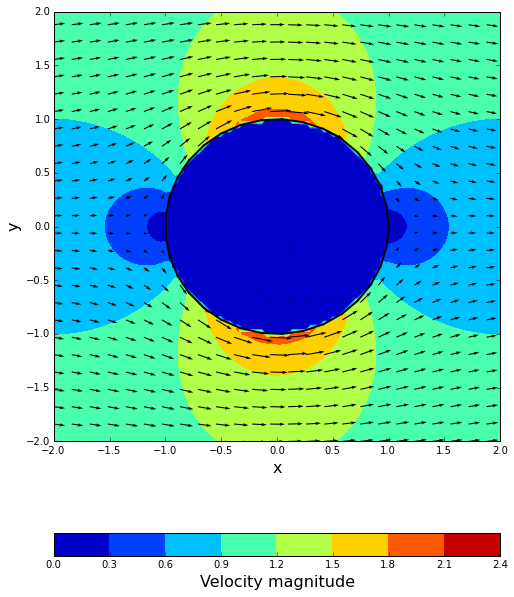

In [4]:
N = 33
circle = make_circle(N)         # set-up geom
solve_gamma(circle)             # find gamma
plot_flow(circle)               # plot the flow

Looks good.

### Bernoulli equation

Next we can determine the pressure $p$ in the flow using the Bernoulli equation.

$$ p+\frac 12 \rho u^2-\rho gz = B $$

where $\rho$ is the density, $\rho gz$ is the head, and $B$ is the Bernoulli coefficient. 

We will assume no hydrostatic pressure.

##### Quiz 1

What is the pressure far from the body, $p_\infty$?

1. $p_\infty = \frac 12 \rho U_\infty^2$
1. $p_\infty = 0$ 
1. $p_\infty = B-\frac 12 \rho U_\infty^2$ 

### Pressure coefficient

To avoid the ambiguity of the Bernoulli coefficient, we typically work with the pressure coefficient $c_p$:

$$c_p = \frac{p-p_\infty}{\frac 12\rho U_\infty^2}$$

##### Quiz 2

How can we simplify the pressure coefficient when there is no hydrostatic pressure?

1. $c_p = 1-u^2/U_\infty^2$
1. $c_p = 0$
1. $c_p = 1-p/p_\infty$

---
We can use this equation to plot the pressure coefficient in the flow.

In [5]:
# plot the pressure on a grid
def plot_flow_pressure(panels,alpha=0,xmax=3,N_grid=100):
    # define the grid
    X = numpy.linspace(-xmax, xmax, N_grid) # computes a 1D-array for x
    Y = numpy.linspace(-xmax, xmax, N_grid) # computes a 1D-array for y
    x, y = numpy.meshgrid(X, Y)             # generates a mesh grid

    # get the velocity from the free stream and panels
    u,v = flow_velocity(panels,x,y,alpha)    
    
    # plot it
    pyplot.figure(figsize=(8,11))       # set size
    pyplot.xlabel('x', fontsize=16)     # label x
    pyplot.ylabel('y', fontsize=16)     # label y
    
    c_p = 1-u**2-v**2                   # compute pressure coefficent
    pressure = pyplot.contourf(x, y, c_p) # plot pressure contours
    cbar = pyplot.colorbar(pressure, orientation='horizontal')
    cbar.set_label('Pressure coefficient', fontsize=16);
    for p in panels: p.plot()

Where we copy-pasted the plot_flow function, and changed the code to plot contours of $c_p$ instead of $|u|$. Lets try it.

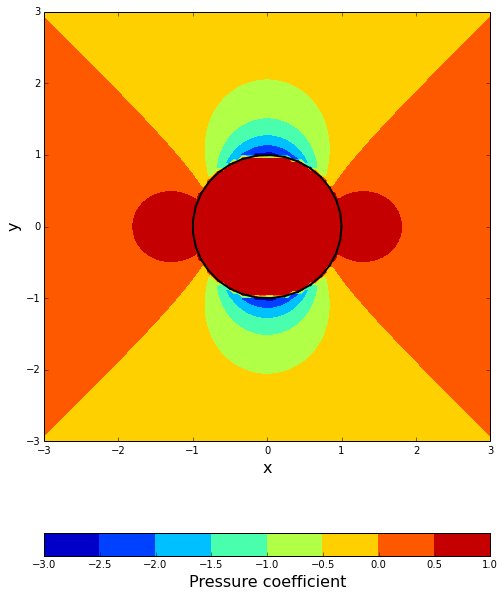

In [6]:
plot_flow_pressure(circle)        # plot the flow

##### Quiz 3

What is $c_p$ at the stagnation points?

1. $c_p = 0$
1. $c_p = 1$
1. $c_p = \infty$

## Surface pressure

The pressure on the surface of the body relates directly to the forces. Since we're using a vortex panel method, this mean we want the pressure on each panel.

##### Quiz 4

What is the velocity magnitude $|u_e|$ just on the **flow side** of panel $i$? 

1. 0
1. $\left|\vec U +\sum_{j=0}^{N-1} \gamma_j \vec f_j(x_i,y_i)\right|$
1. $\left|\gamma_i\right|$

Hint: Remember that we have set a boundary condition on the body side of the panel.

---
This means we have a very simply equation for the surface pressure when using the vortex panel method!

---

## Pressure force

Once we have the surface pressure we can use it to determine the pressure force on the body, as

$$ \vec F_p = -\oint p \hat n da $$

where $\oint da$ is the integral over the body surface, and $\hat n$ is the normal vector to the surface. 

The pressure drag coefficient $C_D$ is then:

$$ C_D = \frac{\vec F_p \cdot \hat x} { \tfrac 12 \rho U_\infty^2 A }  = \frac{-\oint p n_x da}{ \tfrac 12 \rho U_\infty^2 A } $$

where $A$ is the cross-sectional area (in 2D this is the thickness $t$). 

##### Quiz 5

How can we determine the normal $\hat n$ from the properties of a panel?

1. $\hat n = \vec x_1-\vec x_0$
1. $n_x,n_y = -s_y,s_x$
1. $\hat n = \hat z \times \hat s$

Hint: 
![image](resources/graphics6.png)

---


One last wrinkle. Right now we have an array of `Panel`s, each with their own values for $\gamma$. This is not very convenient to post-process.

##### Numerical Fundamental: Data representation
##### Put your data in a convenient form before processing

What we want is $\gamma$ as its own array. This can be done many ways, but the simplest might be

In [7]:
circle_gamma = numpy.asarray([p.gamma for p in circle])
print(circle_gamma)

[  1.82692996e-01   5.41475986e-01   8.80688624e-01   1.18807088e+00
   1.45251316e+00   1.66445783e+00   1.81624465e+00   1.90238767e+00
   1.91977343e+00   1.86777358e+00   1.74826753e+00   1.56557454e+00
   1.32629760e+00   1.03908481e+00   7.14316787e-01   3.63731495e-01
  -7.80120076e-16  -3.63731495e-01  -7.14316787e-01  -1.03908481e+00
  -1.32629760e+00  -1.56557454e+00  -1.74826753e+00  -1.86777358e+00
  -1.91977343e+00  -1.90238767e+00  -1.81624465e+00  -1.66445783e+00
  -1.45251316e+00  -1.18807088e+00  -8.80688624e-01  -5.41475986e-01
  -1.82692996e-01]


where I used a [list comprehension](http://www.pythonforbeginners.com/lists/list-comprehensions-in-python/) to make a list of each gamma, and then converted it to a numpy array.

---

##### Your turn #3

 - **Write** the expression for $c_p$ in terms of $\gamma$
 - **Complete** the function to evaluate this expression for the vortex panel method.
 - **Plot** $c_p$ vs $s$ on the circle using this function. 
 - **Discuss** the accuracy of the numerical method
 - **Complete** the function for the pressure drag coefficient $C_D$ in terms of an integral over $\hat s$ and $\gamma$ (feel free to write it in psuedo-code first if it helps).
 - **Discuss** what the drag should be on the circle. Does the numerical method match?

I've included below a line plot of the analytic solution for a circle: $c_p = 1-4\sin^2(s/R)$, where $s$ is the distance along the circumference and $R$ is the radius.

---

##### Solution #3

$c_p = ?? $

In [8]:
def c_p(gamma):
    
    ### your code for c_p here

    return c_p

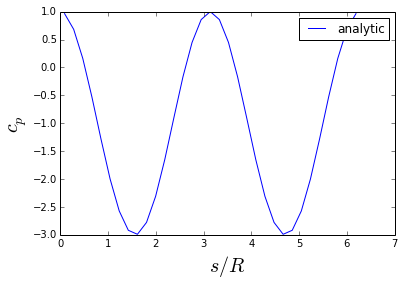

In [9]:
pyplot.xlabel(r'$s/R$', fontsize=20)
pyplot.ylabel(r'$c_p$', fontsize=20)

s = 2*numpy.pi*numpy.linspace(0.5/N,1-0.5/N,N)
pyplot.plot(s,1-4*numpy.sin(s)**2, label='analytic')
pyplot.legend(loc='upper right')

In [10]:
def C_D( panels ):
    # get the thickness
    t = max([p.yc for p in panels])-min([p.yc for p in panels])
    
    # compute the drag coefficient
    ### your code here using (perhaps) p.gamma, p.sx, p.sy, p.S and t
    #return C_D

C_D(circle)